In [1]:
#Se importan la bibliotecas a utilizar 
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
%matplotlib inline

import calendar

import folium
from folium import plugins
from folium.plugins import HeatMapWithTime

In [2]:
#se cargan los datos 
# Archivo de datos con columnas del DwC (https://dwc.tdwg.org/terms/)
archivo_datos = "datos/ara-ambiguus-cr.csv"

# Nombre científico que se desplegará en los gráficos estadísticos
nombre_cientifico = "Ara ambiguus"

# Cantidad máxima de registros que se despliegan en un GeoDataFrame
pd.options.display.max_rows = 12

In [3]:
#se muestra el contenido de los datos 
archivo_datos

'datos/ara-ambiguus-cr.csv'

In [4]:
#Se cargan los datos en un data frame
registros_presencia_df = pd.read_csv(archivo_datos, sep='\t')
#se llaman los datos 
registros_presencia_df

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2862500609,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/58528653,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,Jimmy Barrantes,2020-09-04T18:26:16,CC_BY_NC_4_0,Jimmy Barrantes,Jimmy Barrantes,NaN,NaN,2020-10-25T15:43:27.858Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
1,2851290613,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/56352076,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,Guenther Eichhorn,2020-08-13T20:10:13,CC_BY_NC_4_0,Guenther Eichhorn,Guenther Eichhorn,NaN,NaN,2020-10-25T15:43:01.059Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
2,2845294372,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/169189457,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_NC_4_0,Stichting Natuurinformatie,NaN,NaN,NaN,2020-09-05T06:45:27.187Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
3,2845178469,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/166949654,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_NC_4_0,Stichting Natuurinformatie,NaN,NaN,NaN,2020-09-05T06:45:26.782Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
4,2845109461,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/185649454,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_NC_4_0,Stichting Natuurinformatie,NaN,NaN,NaN,2020-09-05T06:45:12.137Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,898060927,43f37d70-f50e-4021-95ae-5b9526df2388,NaN,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_4_0,NaN,GD,NaN,NaN,2020-09-01T16:13:47.187Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
319,898060922,43f37d70-f50e-4021-95ae-5b9526df2388,NaN,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_4_0,NaN,DVB,NaN,NaN,2020-09-01T16:13:47.186Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
320,898060921,43f37d70-f50e-4021-95ae-5b9526df2388,NaN,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_4_0,NaN,GD,NaN,NaN,2020-09-01T16:13:47.186Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
321,898060919,43f37d70-f50e-4021-95ae-5b9526df2388,NaN,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_4_0,NaN,LTM,NaN,NaN,2020-09-01T16:13:47.191Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


In [5]:
# se busca la información de los registros existentes 
# Información sobre el DataFrame
registros_presencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            323 non-null    int64  
 1   datasetKey                        323 non-null    object 
 2   occurrenceID                      297 non-null    object 
 3   kingdom                           323 non-null    object 
 4   phylum                            323 non-null    object 
 5   class                             323 non-null    object 
 6   order                             323 non-null    object 
 7   family                            323 non-null    object 
 8   genus                             323 non-null    object 
 9   species                           323 non-null    object 
 10  infraspecificEpithet              10 non-null     object 
 11  taxonRank                         323 non-null    object 
 12  scientif

In [6]:
# Selección del subconjunto de columnas de interés
registros_presencia_df = registros_presencia_df[['species', 'stateProvince', 'locality', 'decimalLongitude', 'decimalLatitude', 'eventDate']]
#se llaman los datos nuevamente
registros_presencia_df

,species,stateProvince,locality,decimalLongitude,decimalLatitude,eventDate
0,Ara ambiguus,Alajuela,NaN,-84.311829,10.293973,2020-09-04T12:18:54
1,Ara ambiguus,Limón,NaN,-83.504336,10.485501,2019-04-19T15:31:00
2,Ara ambiguus,NaN,Costa Rica - Pococí,-83.661127,10.501265,2017-08-09T00:00:00
3,Ara ambiguus,NaN,Costa Rica - Tortuguero,-83.502708,10.537014,2019-01-26T00:00:00
4,Ara ambiguus,NaN,Costa Rica - Tortuguero NP,-83.513458,10.527702,2020-02-19T00:00:00
...,...,...,...,...,...,...
318,Ara ambiguus,NaN,Tortuga Lodge & Gardens,-83.519517,10.571319,2002-11-23T00:00:00
319,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2000-11-17T00:00:00
320,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2003-01-04T00:00:00
321,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2004-10-12T00:00:00


In [7]:
#Se tranforman los datos del eventDate 
registros_presencia_df["eventDate"] = pd.to_datetime(registros_presencia_df["eventDate"])
#Se vuelven a llamar los datos 
registros_presencia_df

<ipython-input-7-b27084d0b230>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_presencia_df["eventDate"] = pd.to_datetime(registros_presencia_df["eventDate"])


,species,stateProvince,locality,decimalLongitude,decimalLatitude,eventDate
0,Ara ambiguus,Alajuela,NaN,-84.311829,10.293973,2020-09-04 12:18:54
1,Ara ambiguus,Limón,NaN,-83.504336,10.485501,2019-04-19 15:31:00
2,Ara ambiguus,NaN,Costa Rica - Pococí,-83.661127,10.501265,2017-08-09 00:00:00
3,Ara ambiguus,NaN,Costa Rica - Tortuguero,-83.502708,10.537014,2019-01-26 00:00:00
4,Ara ambiguus,NaN,Costa Rica - Tortuguero NP,-83.513458,10.527702,2020-02-19 00:00:00
...,...,...,...,...,...,...
318,Ara ambiguus,NaN,Tortuga Lodge & Gardens,-83.519517,10.571319,2002-11-23 00:00:00
319,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2000-11-17 00:00:00
320,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2003-01-04 00:00:00
321,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2004-10-12 00:00:00


In [8]:
#creación de los gráficos

#eventos por mes 

# Agrupación de los registros por mes
registros_x_mes = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.month).count().eventDate

registros_x_mes

eventDate
1.0     46
2.0     49
3.0     37
4.0     24
5.0     22
6.0     30
7.0     41
8.0      7
9.0      5
10.0    14
11.0    25
12.0    22
Name: eventDate, dtype: int64

In [9]:
# Reemplazo del número del mes por el nombre del mes
registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]

registros_x_mes

January      46
February     49
March        37
April        24
May          22
June         30
July         41
August        7
September     5
October      14
November     25
December     22
Name: eventDate, dtype: int64

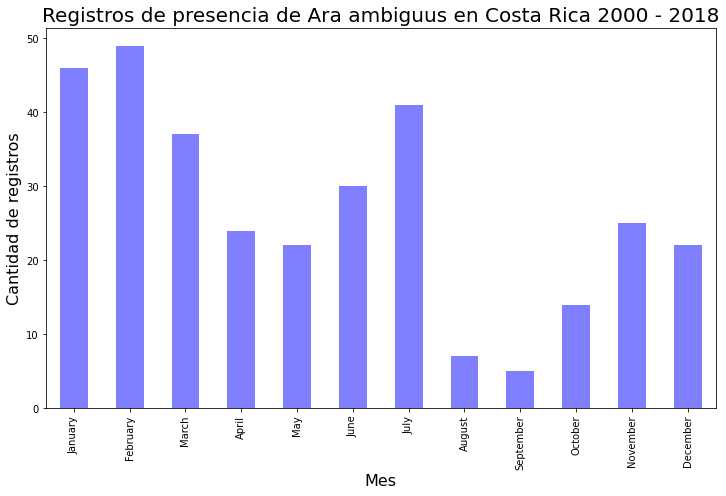

In [10]:
# Gráfico de barras
registros_x_mes.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica 2000 - 2018', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [11]:
#eventos por año 

# Agrupación de los registros por año
registros_x_año = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.year).count().eventDate

registros_x_año

eventDate
1933.0     2
2000.0     1
2001.0     2
2002.0     2
2003.0     1
          ..
2016.0    38
2017.0    33
2018.0    52
2019.0    86
2020.0     9
Name: eventDate, Length: 19, dtype: int64

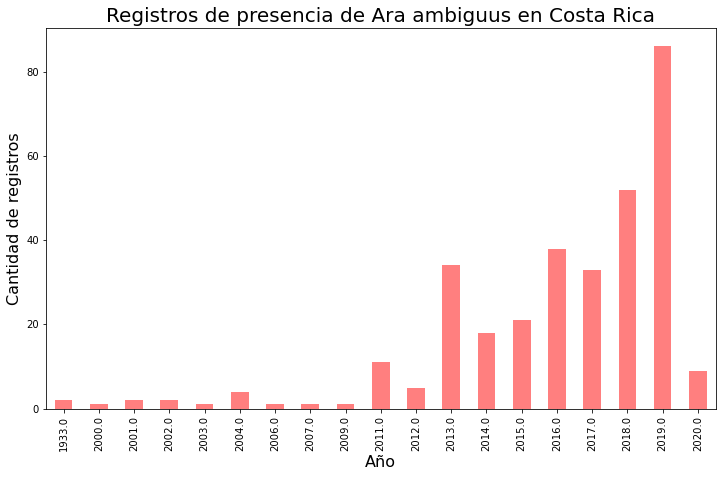

In [12]:
# Gráfico de barras
registros_x_año.plot(kind='bar',figsize=(12,7), color='Red', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [13]:
#Creación de mapas 
#primero se crean los geodataframes a partir de los dataframe creados 

# Geodataframe
registros_presencia_geom = [Point(xy) for xy in zip(registros_presencia_df["decimalLongitude"], registros_presencia_df["decimalLatitude"])]
registros_presencia_gdf=gpd.GeoDataFrame(registros_presencia_df, crs={"init": "epsg:4326"}, geometry=registros_presencia_geom)

C:\Users\mauguemu\anaconda3\envs\leccion-12a\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
# se llaman los datos y se verifica que tienen una geometría  
registros_presencia_df

,species,stateProvince,locality,decimalLongitude,decimalLatitude,eventDate,geometry
0,Ara ambiguus,Alajuela,NaN,-84.311829,10.293973,2020-09-04 12:18:54,POINT (-84.31183 10.29397)
1,Ara ambiguus,Limón,NaN,-83.504336,10.485501,2019-04-19 15:31:00,POINT (-83.50434 10.48550)
2,Ara ambiguus,NaN,Costa Rica - Pococí,-83.661127,10.501265,2017-08-09 00:00:00,POINT (-83.66113 10.50127)
3,Ara ambiguus,NaN,Costa Rica - Tortuguero,-83.502708,10.537014,2019-01-26 00:00:00,POINT (-83.50271 10.53701)
4,Ara ambiguus,NaN,Costa Rica - Tortuguero NP,-83.513458,10.527702,2020-02-19 00:00:00,POINT (-83.51346 10.52770)
...,...,...,...,...,...,...,...
318,Ara ambiguus,NaN,Tortuga Lodge & Gardens,-83.519517,10.571319,2002-11-23 00:00:00,POINT (-83.51952 10.57132)
319,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2000-11-17 00:00:00,POINT (-83.52698 10.58447)
320,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2003-01-04 00:00:00,POINT (-83.52698 10.58447)
321,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2004-10-12 00:00:00,POINT (-83.52698 10.58447)


In [15]:
# se procede a crear el primer mapa

# Mapa centrado en Costa Rica
presencia_ara_ambiguus = folium.Map(location=[9.63, -84], 
                                    width=900,
                                    height=500,
                                    zoom_start=7.5,
                                    tiles='openstreetmap',
                                    control_scale=True)

#se agregan las capas adicionales 
folium.TileLayer(tiles='Stamen Terrain',name='Stamen Terrain').add_to(presencia_ara_ambiguus)

#se agrega el control de capas 
folium.LayerControl().add_to(presencia_ara_ambiguus)

#se agregan los puntos de presencia
for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        fill=True,
        popup=label,
        fill_color='darkred',
        fill_opacity=0.6
    ).add_to(presencia_ara_ambiguus)

presencia_ara_ambiguus

In [16]:
#se crea el mapa de clusters

# Mapa centrado en Costa Rica
clusters_presencia_ara_ambiguus = folium.Map(location=[9.63, -84], 
                                    width=900,
                                    height=500,
                                    zoom_start=7.5,
                                    tiles='openstreetmap',
                                    control_scale=True)



#se agregan los puntos de presencia con el marcador del cluster

# Instantiate a mark cluster object 
cluster_presencia = plugins.MarkerCluster(name='Clusters de observacion').add_to(clusters_presencia_ara_ambiguus)

for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        name='presencia Ara ambigus'
    ).add_to(cluster_presencia) 

#se agregan las capas adicionales 
folium.TileLayer(tiles='Stamen Terrain',name='Stamen Terrain').add_to(clusters_presencia_ara_ambiguus)

#se agrega el control de capas 
folium.LayerControl().add_to(clusters_presencia_ara_ambiguus)

clusters_presencia_ara_ambiguus